# Variáveis descritivas

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sinasc = pd.read_csv('sinasc_ro_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [28]:
quebras = [0,3,5,7,10]

sinasc['categoria'] = pd.cut(sinasc['APGAR5'], bins = quebras, labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'])

sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,categoria
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [29]:
# Inicialmente para não ocorrer problemas nos gráficos, preencho os valores não preenchidos no dataframe 
# com valroes coerentes presentes no pdf com a descição de cada.
sns.set_theme()
sinasc_fill = pd.DataFrame(sinasc[['APGAR5','SEXO', 'GESTACAO']])
sinasc_fill = sinasc_fill.fillna({'APGAR5':10, 'SEXO': 0, 'GESTACAO': 9})

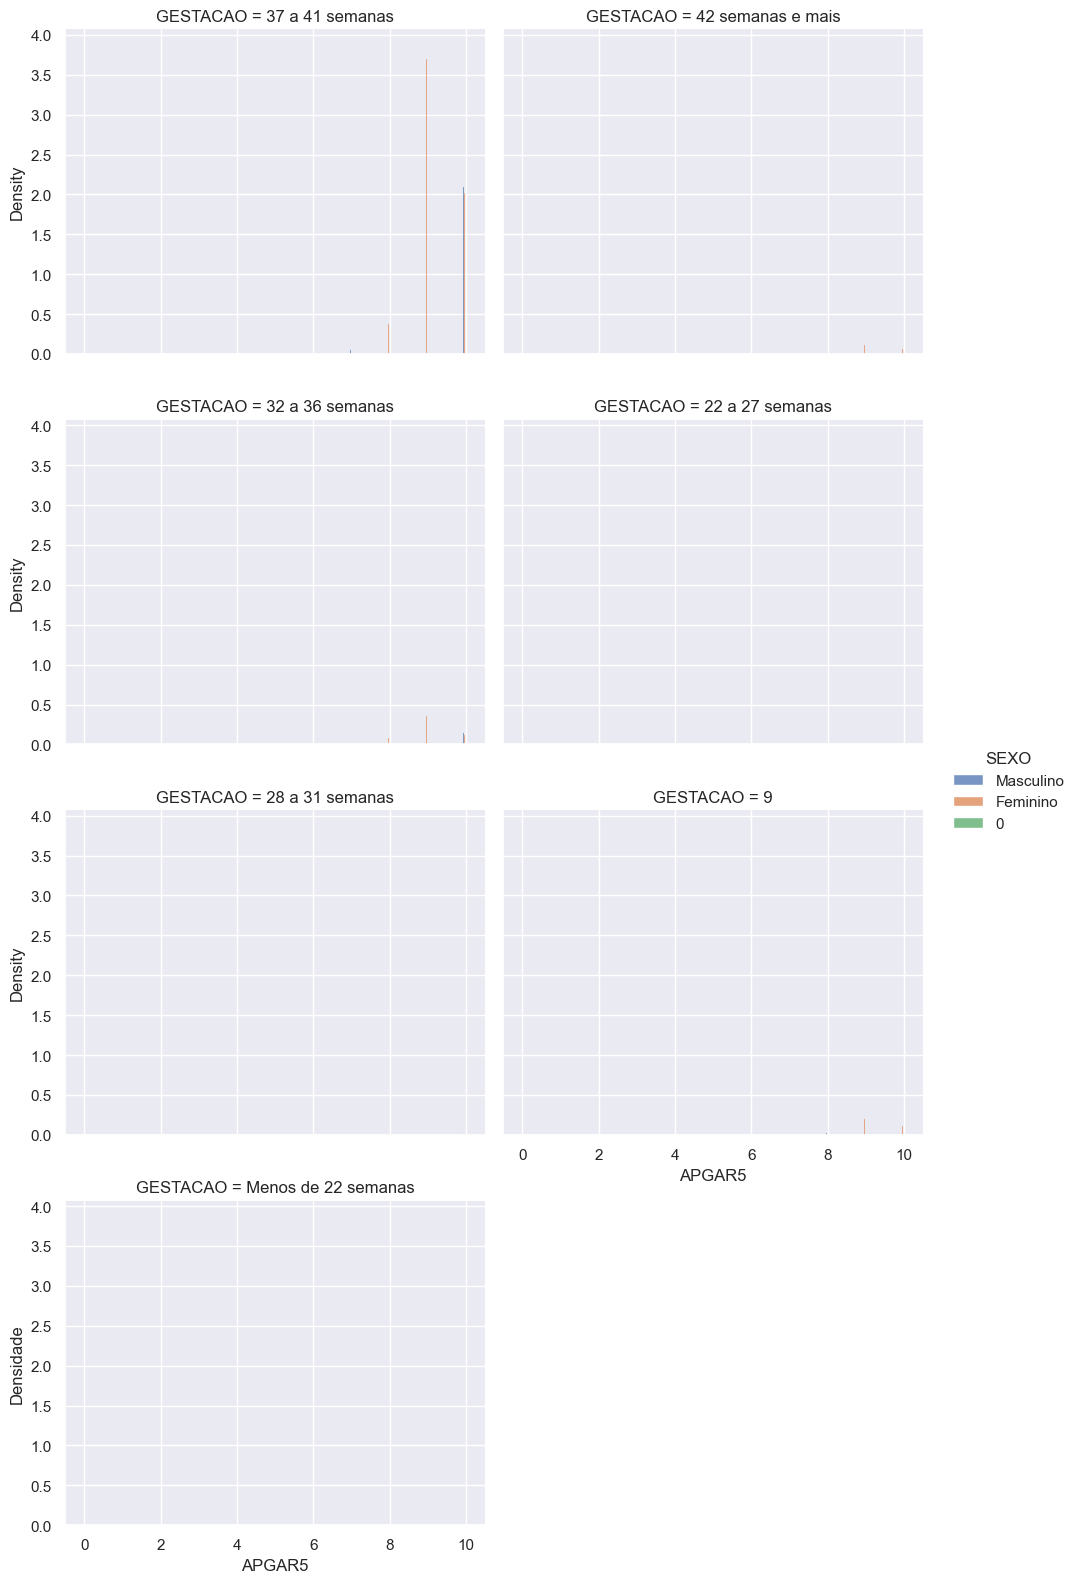

In [30]:
# Após isso, posso montar o gráfico.

sns.displot(data = sinasc_fill, x = 'APGAR5', 
            hue = 'SEXO',
            col = 'GESTACAO',
            multiple = 'dodge',
            height = 4,
            aspect = 1.2,
            col_wrap = 2,
            stat = "density"
            )

plt.xlabel('APGAR5')
plt.ylabel('Densidade')

plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [31]:
cruzada = pd.crosstab(sinasc_fill['GESTACAO'], sinasc_fill['APGAR5'])
cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
9,1,2,2,1,2,5,7,7,86,704,415
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,9
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,16
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,480
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7350
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,225
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [32]:
cruzada_pctlin = cruzada.div(cruzada.sum(axis = 1), axis = 0)
cruzada_pctlin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
9,0.000812,0.001623,0.001623,0.000812,0.001623,0.004058,0.005682,0.005682,0.069805,0.571429,0.336851
22 a 27 semanas,0.081395,0.000000,0.093023,0.069767,0.011628,0.000000,0.023256,0.116279,0.279070,0.220930,0.104651
28 a 31 semanas,0.000000,0.000000,0.012121,0.006061,0.030303,0.042424,0.042424,0.066667,0.369697,0.333333,0.096970
32 a 36 semanas,0.000889,0.000889,0.000889,0.000889,0.003557,0.004891,0.007559,0.024900,0.160960,0.581147,0.213428
37 a 41 semanas,0.000221,0.000885,0.000133,0.000221,0.000310,0.000930,0.001992,0.006685,0.062730,0.600514,0.325380
42 semanas e mais,0.001429,0.000000,0.000000,0.000000,0.000000,0.001429,0.001429,0.007143,0.062857,0.604286,0.321429
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

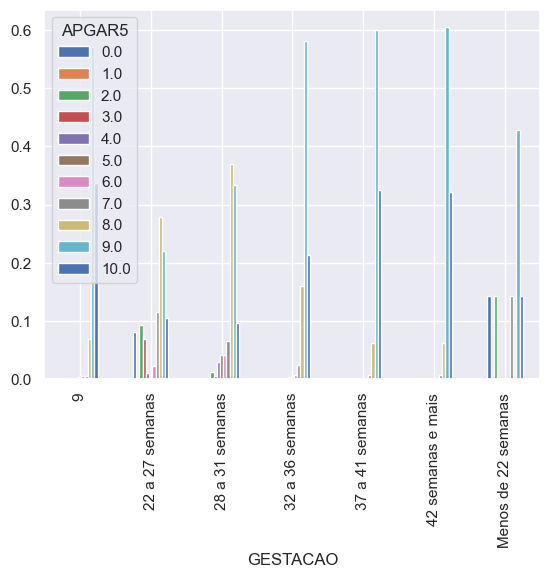

In [33]:
cruzada_pctlin.plot.bar()

A partir do gráfico podemos perceber que entre o periodo de gestação de 32 a 36 semanas tem uma queda somente no APGAR5 de valor 10, porém o valor 9 continua virtuamente o mesmo. Nitidamente há uma queda consideravel no APGAR5 de a partir do periodo de 28 a 31 semanas. Portanto, com base nos dados acima, a classificação como prematuro deveria ser iniciada a partir periodo de 28 a 31 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

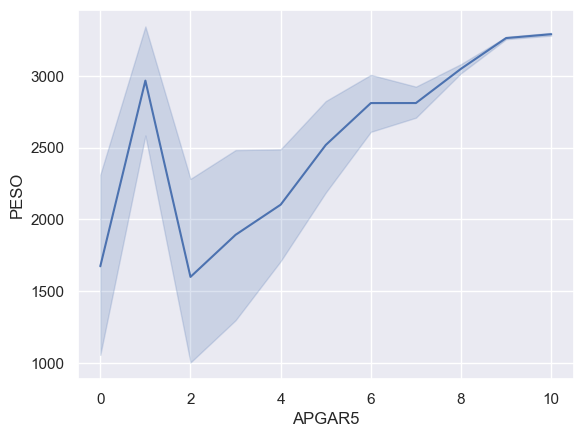

In [38]:
# Preencher os valores faltantes em peso
sinasc_peso = pd.DataFrame(sinasc[['APGAR5','PESO']])
sinasc_peso = sinasc_peso.fillna({'APGAR5':8})
sns.lineplot(data = sinasc_peso, y = "PESO", x = "APGAR5")